<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_3_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n250.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.279105,33.294789,98.213132,0.000092,193.787118,193.787779,-0.000660
1,0.0,1.0,27.307392,41.573326,82.168421,-0.002289,161.046850,161.049179,-0.002329
2,0.0,2.0,99.287516,97.719183,39.175324,-0.000039,246.181985,246.181655,0.000330
3,0.0,3.0,70.721573,53.467880,42.478189,-0.001441,176.666201,176.667483,-0.001281
4,0.0,4.0,90.132872,75.537285,73.216941,0.000912,248.888010,248.887439,0.000572
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,94.370226,63.654966,46.022169,0.000358,214.047720,214.045421,0.002299
19996,999.0,16.0,68.846111,22.658485,86.742943,0.001794,188.249333,188.248727,0.000607
19997,999.0,17.0,97.444221,21.081859,95.757670,0.005498,224.289249,224.284748,0.004501
19998,999.0,18.0,75.949360,70.073804,47.160659,-0.000965,203.182857,203.182474,0.000383


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.279105,33.294789,98.213132,0.000092,193.787118,193.787779,-0.000660
1,0.0,1.0,27.307392,41.573326,82.168421,-0.002289,161.046850,161.049179,-0.002329
2,0.0,2.0,99.287516,97.719183,39.175324,-0.000039,246.181985,246.181655,0.000330
3,0.0,3.0,70.721573,53.467880,42.478189,-0.001441,176.666201,176.667483,-0.001281
4,0.0,4.0,90.132872,75.537285,73.216941,0.000912,248.888010,248.887439,0.000572
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,94.370226,63.654966,46.022169,0.000358,214.047720,214.045421,0.002299
19996,999.0,16.0,68.846111,22.658485,86.742943,0.001794,188.249333,188.248727,0.000607
19997,999.0,17.0,97.444221,21.081859,95.757670,0.005498,224.289249,224.284748,0.004501
19998,999.0,18.0,75.949360,70.073804,47.160659,-0.000965,203.182857,203.182474,0.000383


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    52.279105  33.294789  98.213132  ...  193.787118  193.787779 -0.000660
      1.0    27.307392  41.573326  82.168421  ...  161.046850  161.049179 -0.002329
      2.0    99.287516  97.719183  39.175324  ...  246.181985  246.181655  0.000330
      3.0    70.721573  53.467880  42.478189  ...  176.666201  176.667483 -0.001281
      4.0    90.132872  75.537285  73.216941  ...  248.888010  248.887439  0.000572
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   94.370226  63.654966  46.022169  ...  214.047720  214.045421  0.002299
      16.0   68.846111  22.658485  86.742943  ...  188.249333  188.248727  0.000607
      17.0   97.444221  21.081859  95.757670  ...  224.289249  224.284748  0.004501
      18.0   75.949360  70.073804  47.160659  ...  203.182857  203.182474  0.000383
      19.0   44.722222  33.169060  55.132803  ...  143.027089  143.023927  0.003162

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    52.279105  33.294789  98.213132  ...  193.787118  193.787779 -0.000660
      1.0    27.307392  41.573326  82.168421  ...  161.046850  161.049179 -0.002329
      2.0    99.287516  97.719183  39.175324  ...  246.181985  246.181655  0.000330
      3.0    70.721573  53.467880  42.478189  ...  176.666201  176.667483 -0.001281
      4.0    90.132872  75.537285  73.216941  ...  248.888010  248.887439  0.000572
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   94.370226  63.654966  46.022169  ...  214.047720  214.045421  0.002299
      16.0   68.846111  22.658485  86.742943  ...  188.249333  188.248727  0.000607
      17.0   97.444221  21.081859  95.757670  ...  224.289249  224.284748  0.004501
      18.0   75.949360  70.073804  47.160659  ...  203.182857  203.182474  0.000383
      19.0   44.722222  33.169060  55.132803  ...  143.027089  143.023927  0.003162

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.279105,33.294789,98.213132,0.000092,193.787118,193.787779,-0.000660
1,0.0,1.0,27.307392,41.573326,82.168421,-0.002289,161.046850,161.049179,-0.002329
2,0.0,2.0,99.287516,97.719183,39.175324,-0.000039,246.181985,246.181655,0.000330
3,0.0,3.0,70.721573,53.467880,42.478189,-0.001441,176.666201,176.667483,-0.001281
4,0.0,4.0,90.132872,75.537285,73.216941,0.000912,248.888010,248.887439,0.000572
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,94.370226,63.654966,46.022169,0.000358,214.047720,214.045421,0.002299
19996,999.0,16.0,68.846111,22.658485,86.742943,0.001794,188.249333,188.248727,0.000607
19997,999.0,17.0,97.444221,21.081859,95.757670,0.005498,224.289249,224.284748,0.004501
19998,999.0,18.0,75.949360,70.073804,47.160659,-0.000965,203.182857,203.182474,0.000383


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    52.279105  33.294789  98.213132  ...  193.787118  193.787779 -0.000660
      1.0    27.307392  41.573326  82.168421  ...  161.046850  161.049179 -0.002329
      2.0    99.287516  97.719183  39.175324  ...  246.181985  246.181655  0.000330
      3.0    70.721573  53.467880  42.478189  ...  176.666201  176.667483 -0.001281
      4.0    90.132872  75.537285  73.216941  ...  248.888010  248.887439  0.000572
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   94.370226  63.654966  46.022169  ...  214.047720  214.045421  0.002299
      16.0   68.846111  22.658485  86.742943  ...  188.249333  188.248727  0.000607
      17.0   97.444221  21.081859  95.757670  ...  224.289249  224.284748  0.004501
      18.0   75.949360  70.073804  47.160659  ...  203.182857  203.182474  0.000383
      19.0   44.722222  33.169060  55.132803  ...  143.027089  143.023927  0.003162

[20000 rows x 7 columns]

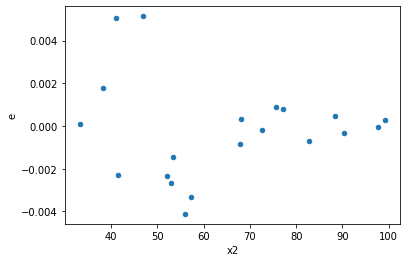

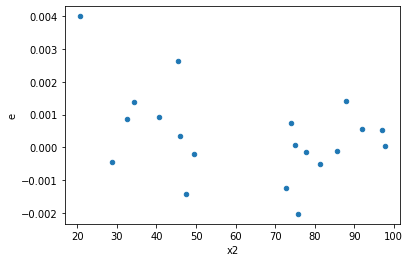

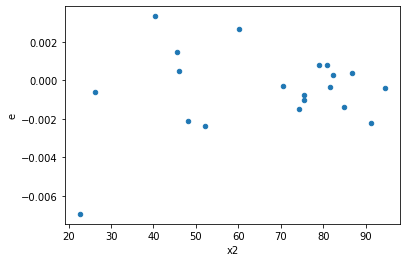

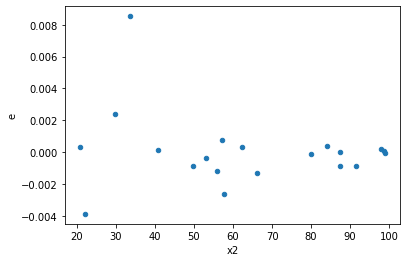

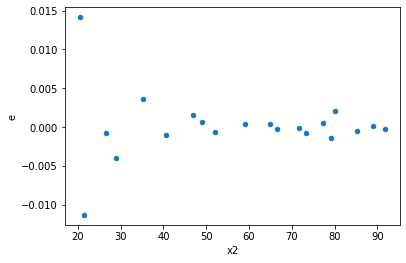

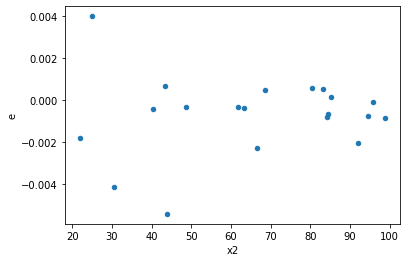

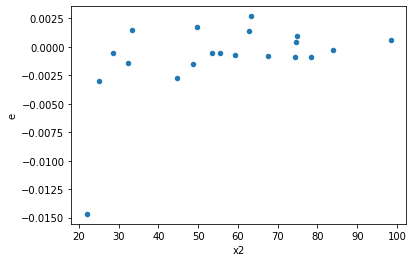

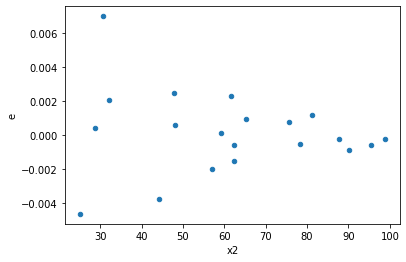

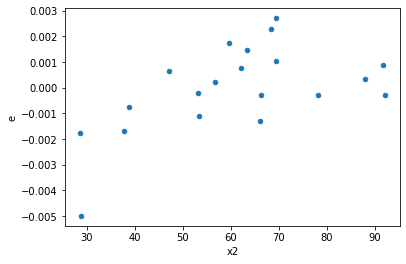

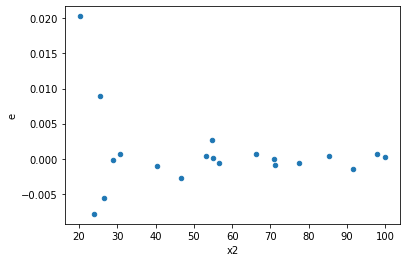

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
155.0,5.0,5.0,5.747639301736859e-06,5.848900417139887e-06,1.1495278603473718e-06,1.1697800834279774e-06,1.0176178618885197,0.9851766424190695,0.5074116787904652,0.4925883212095348,Reject001=1 : Homoscedasticity
162.0,5.0,5.0,4.2780678638334785e-06,4.714642941890338e-06,8.556135727666957e-07,9.429285883780676e-07,1.102049591533514,0.9176800195327253,0.5411599902336374,0.45884000976636263,Reject001=1 : Homoscedasticity
179.0,5.0,5.0,4.332026803808985e-06,4.654668217768679e-06,8.66405360761797e-07,9.309336435537357e-07,1.0744781665884449,0.9390899391452607,0.5304550304273696,0.46954496957263037,Reject001=1 : Homoscedasticity
330.0,5.0,5.0,2.288786674066089e-06,2.2977527021314324e-06,4.577573348132178e-07,4.595505404262865e-07,1.0039173716654926,0.9966813382253523,0.5016593308873238,0.49834066911267616,Reject001=1 : Homoscedasticity
436.0,5.0,5.0,2.828507971454049e-06,6.123406922451294e-06,5.657015942908098e-07,1.2246813844902588e-06,2.1648893990224245,0.4166015976382482,0.7916992011808759,0.2083007988191241,Reject001=1 : Homoscedasticity
494.0,5.0,5.0,4.519542464767821e-06,4.639200572703145e-06,9.039084929535643e-07,9.27840114540629e-07,1.0264757127227193,0.9778222212597809,0.5110888893701095,0.48891111062989046,Reject001=1 : Homoscedasticity
609.0,5.0,5.0,9.287982427594501e-07,3.143396820668372e-06,1.8575964855189002e-07,6.286793641336744e-07,3.384369905060729,0.20699437574322332,0.8965028121283883,0.10349718787161166,Reject001=1 : Homoscedasticity
618.0,5.0,5.0,1.4926279290192144e-06,2.1097066619908534e-06,2.985255858038429e-07,4.219413323981707e-07,1.4134176514954488,0.7134404632700202,0.6432797683649899,0.3567202316350101,Reject001=1 : Homoscedasticity
685.0,5.0,5.0,2.1172258680243484e-06,6.1865469193529845e-06,4.234451736048697e-07,1.2373093838705968e-06,2.922006108458258,0.2642423740135771,0.8678788129932115,0.13212118700678854,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,5.4190420955735345e-05,2.0760701727402574e-06,1.0838084191147069e-05,4.152140345480515e-07,0.03831064856344381,0.0027297371289658197,Reject001=0 : Heteroscedasticity
1.0,5.0,5.0,4.566022938493434e-06,3.8820605221966194e-06,9.132045876986868e-07,7.764121044393239e-07,0.8502060928054626,0.8630069150726627,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,4.4651330101375064e-05,5.020560226529994e-06,8.930266020275013e-06,1.0041120453059987e-06,0.1124392087566364,0.031543094137168014,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,8.847816638199209e-05,1.3620553305339382e-06,1.769563327639842e-05,2.7241106610678766e-07,0.015394253590806291,0.0003025152974852754,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,0.0002636095418993878,3.769612994009413e-06,5.272190837987756e-05,7.539225988018826e-07,0.014299986892918186,0.0002525572997393601,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,4.492034242708632e-05,8.479534044623502e-07,8.984068485417264e-06,1.6959068089247005e-07,0.01887682414350979,0.0004975893227043098,Reject001=0 : Heteroscedasticity
6.0,5.0,5.0,5.8348981941330985e-05,6.742632038415735e-06,1.1669796388266197e-05,1.348526407683147e-06,0.11555697827248039,0.03344299358360401,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,7.15319017114547e-05,2.1320360466034714e-06,1.4306380342290938e-05,4.2640720932069425e-07,0.029805387464794043,0.0015006369748920938,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,9.292903120546026e-06,6.035714765416887e-06,1.8585806241092053e-06,1.2071429530833774e-06,0.649497222463484,0.6473531818807055,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    548
Reject001=1 : Homoscedasticity      452
Name: Result_test, dtype: int64